In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
plt.style.use("seaborn-dark") # Plot style
# allows to output plots in the notebook
%matplotlib inline 

#### Training data

* Huge csv
* Acoustic data: the seismic signal
* Time to failure: the time until the next laboratory earthquake in sec
* No missing values 

In [4]:
train = pd.read_csv("train.csv", dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [5]:
pd.set_option("display.precision", 15)
train.head()

,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788


In [6]:
train.shape

(629145480, 2)

In [7]:
#display acoustic data statistics
pd.set_option("display.precision", 8)
train.acoustic_data.describe()

count    6.29145480e+08
mean     4.51946757e+00
std      1.07357072e+01
min     -5.51500000e+03
25%      2.00000000e+00
50%      5.00000000e+00
75%      7.00000000e+00
max      5.44400000e+03
Name: acoustic_data, dtype: float64

#### Test data

Test folder contain many csv files

In [8]:
test_folder_files = os.listdir("test")
print(test_folder_files[:10])  # print first 10
print("\nNumber of files in the test folder", len(test_folder_files))

['seg_00a37e.csv', 'seg_d6b386.csv', 'seg_4280d9.csv', 'seg_376908.csv', 'seg_26a2a0.csv', 'seg_eb1d6e.csv', 'seg_b87cf5.csv', 'seg_d56d32.csv', 'seg_c243a6.csv', 'seg_0dc38f.csv']

Number of files in the test folder 2624


#### Sample submission

In [9]:
sample_sub = pd.read_csv('sample_submission.csv')
print("Submission shape", sample_sub.shape)
sample_sub.head()

Submission shape (2624, 2)


,seg_id,time_to_failure
0,seg_00030f,0
1,seg_0012b5,0
2,seg_00184e,0
3,seg_003339,0
4,seg_0042cc,0


*****************************************

In [10]:
# time_to_failure stats
tmin = np.min(train.time_to_failure)
tmax = np.max(train.time_to_failure) 
tmean = np.mean(train.time_to_failure)
print("min value: {:.6f}, max value: {:.2f}, mean: {:.4f}".format(tmin, tmax, tmean))

min value: 0.000096, max value: 16.11, mean: 5.6783


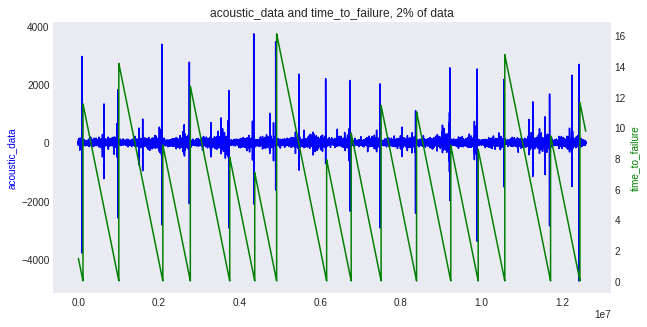

In [11]:
train_acoustic_data_small = train['acoustic_data'].values[::50]
train_time_to_failure_small = train['time_to_failure'].values[::50]

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title("acoustic_data and time_to_failure, 2% of data")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.grid(False)

* fluctuations (acoustic data) before the failure
* periodic data

********************************************************************

In [12]:
from feature_engineering import *

In [13]:
wavelet = 'db4'
level = 9
training_fg = FeatureGenerator(dtype='train', n_jobs=1, chunk_size=150000, wavelet=wavelet, level=level)
#training_data = training_fg.generate()

test_fg = FeatureGenerator(dtype='test', n_jobs=1, chunk_size=None, wavelet=wavelet, level=level)
#test_data = test_fg.generate()

#training_data.to_csv("train_features.csv", index=False)
#test_data.to_csv("test_features.csv", index=False)

In [15]:
training_data = pd.read_csv("train_features.csv")
test_data = pd.read_csv("test_features.csv")

In [16]:
training_data.dropna(axis=1, inplace=True)
test_data.dropna(axis=1, inplace=True)
print(training_data.shape, test_data.shape)

(4179, 1530) (2624, 1530)


In [17]:
training_data.head()

,energy_chunk0_diff_cA,energy_chunk0_diff_cD1,energy_chunk0_diff_cD2,energy_chunk0_diff_cD3,energy_chunk0_diff_cD4,energy_chunk0_diff_cD5,energy_chunk0_diff_cD6,energy_chunk0_diff_cD7,energy_chunk0_diff_cD8,energy_chunk0_diff_cD9,...,varregular_cA,varregular_cD1,varregular_cD2,varregular_cD3,varregular_cD4,varregular_cD5,varregular_cD6,varregular_cD7,varregular_cD8,varregular_cD9
0,1507.98658598,45343.18064692,20294.98292390,61753.82729028,64703.89107257,3813.75976922,237.61509845,11.64131898,9.16335181,14.50563695,...,126.54318032,4.13209274,9.27327685,62.84413384,187.30772639,51.73166106,15.77205789,6.40279260,6.62136738,9.79030814
1,1048.69939301,45525.43935062,19944.91243696,9160.18168006,5397.05242538,223.61678595,13.48805669,3.43354952,5.62035715,10.46047462,...,38.07671485,4.14135109,10.12235410,115.96460370,291.85165267,158.96996280,56.83920563,8.82328205,7.04317231,9.97019093
2,2438.78286376,47092.25275878,21627.87646713,45221.05125070,30105.52253069,1456.41663389,135.92982543,15.86506656,13.57615612,24.42265539,...,97.02801836,4.15656649,10.32526553,118.66547507,351.77099609,199.44711695,36.98523647,10.86322911,7.58399945,11.42941801
3,1.57228816,43736.50417512,19987.08657403,16027.82982482,11863.63036643,321.81105847,28.08485792,1.34897373,0.13405816,0.02131132,...,210.03254803,4.10432528,10.13669809,126.99197728,280.62360621,266.98747030,83.69227185,12.03996746,8.40564661,11.45863898
4,4281.78694780,43891.13783135,19819.52531025,13741.94598521,18356.19231013,324.36847136,39.00519118,13.79124873,21.88790254,41.83126741,...,41.28709986,4.07984762,9.85246963,94.06225352,376.38286469,395.41950875,58.47809036,12.75828215,7.92335540,10.92513244


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
features_cols = [c for c in training_data.columns if (('target' not in c) and ('seg_id' not in c))]

X = training_data[features_cols].values
y = training_data['target'].values
X_test = test_data[features_cols].values

In [20]:
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled

array([[ -0.104889  ,   0.48662047,   0.0519432 , ...,  -0.05916843,
         -0.05934895,  -0.07578433],
       [ -0.11282465,   0.6359871 ,  -0.10302314, ...,  -0.05725039,
         -0.05877725,  -0.07537132],
       [ -0.08880652,   1.92003903,   0.64197759, ...,  -0.05563391,
         -0.05804424,  -0.07202096],
       ...,
       [ -0.05332582,  -1.47376904,  -0.62760345, ...,  -0.05913308,
         -0.05873534,  -0.07771708],
       [ -0.12778403,  -0.19585704,  -0.09048256, ...,  -0.05965076,
         -0.05871682,  -0.07451162],
       [ -0.12990839, -25.04782876,  -6.31871558, ...,  -0.05908113,
         -0.05864919,  -0.08143768]])

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled,y)

In [37]:
rf = RandomForestRegressor(n_jobs=100,criterion='mae', max_depth=10)

In [38]:
rf.fit(X_train,y_train)

/home/anastasiia/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=100,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
mean_absolute_error(rf.predict(X_test),y_test)

2.057921039973532

In [40]:
mean_absolute_error(rf.predict(X_train),y_train)

1.2897721083533256

In [42]:
rf.fit(X_train_scaled,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=100,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
y_pred = rf.predict(X_test_scaled)

In [45]:
# submission
sub = pd.read_csv('sample_submission.csv')
sub['time_to_failure'] = y_pred
sub.to_csv('submission.csv', index=False)